# e2e

> Fill in a module description here

# Embedding Projector

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

In [ ]:
import io
import json
import math
import os

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorboard.plugins import projector

from portfolio_search.fileorg import *

In [ ]:
singleline_data_home()

Path('/Users/al/singleline_data')

In [ ]:
%load_ext tensorboard

## Loading TSV's and Centroids

In [ ]:
raster_epoch_dir = singleline_data_home() / "raster/epoch-20231214/"
subclusters_dir = (
    raster_epoch_dir / "04_SUBCLUSTERS"
)

In [ ]:
drawing_centroids_fname = f"{subclusters_dir}/centroids_drawings.json"
with open(drawing_centroids_fname, "r") as infile:
    drawing_centroids = json.load(infile)

In [ ]:
watercolor_centroids_fname = f"{subclusters_dir}/centroids_watercolors.json"
with open(watercolor_centroids_fname, "r") as infile:
    watercolor_centroids = json.load(infile)

In [ ]:
clustered_drawings_tsv_fname = f"{subclusters_dir}/clustered_drawings.tsv"
# drawings_df.to_csv(
#     clustered_drawings_tsv_fname, index=True, index_label="idx", sep="\t", header=True
# )
clustered_drawings_df = pd.read_csv(
    clustered_drawings_tsv_fname, delimiter="\t", index_col="idx"
)
clustered_drawings_df.head()

,abs_fname,rel_fname,label,pred_label,pred_idx,pred_probs,emb_csv,cluster,cluster_dist,metacluster,...,drawings_cluster48_id,drawings_cluster48_dist,drawings_cropped_cluster16_id,drawings_cropped_cluster16_dist,drawings_cropped_cluster32_id,drawings_cropped_cluster32_dist,drawings_cropped_cluster48_id,drawings_cropped_cluster48_dist,drawings_cropped_cluster64_id,drawings_cropped_cluster64_dist
idx,,,,,,,,,,,,,,,,,,,,,
0,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/01_FLAT/art/sb77p043.jpg,art/sb77p043.jpg,art,xtra,4,"0.168532,0.008473,0.008068,0.016940,0.797986","-0.6198182,-0.5714155,-0.6871516,-0.6553513,-0.6254566,-0.65341413,-0.7267234,-0.4896673,-0.7537334,-0.42715576,1.4904574,-0.72562873,-0.662768,-0.6266761,0.6913696,0.054546177,-0.5467274,-0.6520286,0.117179275,0.94330966,0.5815062,-0.55193967,-0.5446661,-0.6779002,-0.57759243,-0.4584825,-0.3818994,-0.5750927,-0.73986673,-0.45211998,-0.6141643,-0.67007643,-0.52171326,-0.4592305,1.4788612,-0.6186755,0.799198,-0.57338566,-0.17778617,0.10336053,0.093812525,0.17924881,-0.6189488,-0.6682474,2.1040225,-0.59257406,1.6553459,-0.6001429,0.5109105,0.19352531,-0.2517513,-0.66552746,-0.6482407,-0.4732...",11,199.22961,1,...,15,166.33705,15,265.844100,15,257.350560,15,268.67297,58,276.82034
1,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/01_FLAT/art/sb67p021.jpg,art/sb67p021.jpg,art,xtra,4,"0.170976,0.008673,0.008480,0.017028,0.794843","1.1073987,0.3512016,-0.73929733,-0.6553513,1.7477593,-0.65341413,0.32179314,-0.4896673,-0.1797334,-0.42715576,1.3163843,-0.72562873,-0.61387855,-0.6266761,-0.35361218,0.37611246,-0.08771938,-0.5262803,0.9261699,-0.6497359,-0.64108604,-0.55193967,-0.5446661,-0.6779002,-0.32559583,-0.6690378,-0.4518578,0.51828945,-0.4238917,-0.45211998,-0.16527033,-0.67007643,1.0136865,-0.4592305,-0.600525,-0.060860336,-0.19446748,-0.24127388,2.2282472,1.8003348,-0.61049384,0.39795423,0.2626753,-0.6682474,-0.75794554,-0.59257406,0.80257696,-0.6001429,-0.651804,-0.028328001,0.53641737,-0.6501347,-0.6482407,0....",3,132.26111,0,...,45,137.20117,14,121.146545,31,122.172424,31,116.40921,34,122.04242
2,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/01_FLAT/art/sb25p227.jpg,art/sb25p227.jpg,art,xtra,4,"0.158396,0.008277,0.007424,0.016584,0.809319","1.3776337,-0.5714155,-0.2587232,-0.6553513,1.3532461,-0.65341413,-0.7267234,-0.4896673,-0.7537334,-0.25077122,0.050992966,-0.72562873,0.1406585,-0.6266761,1.0653365,0.96198404,-0.5467274,0.30261123,0.6327609,-0.6497359,-0.64108604,-0.28434965,-0.35651857,-0.6779002,-0.28245115,-0.6690378,-0.4518578,0.030088186,-0.73986673,-0.18931103,-0.041653574,-0.67007643,-0.52171326,-0.29881266,-0.600525,-0.23231092,-0.73933,-0.57338566,-0.65925777,1.8833572,-0.61049384,0.44560486,0.14075392,-0.6682474,-0.75794554,-0.59257406,-0.07511848,-0.6001429,-0.651804,-0.5315948,0.023931146,0.723624,-0.6482407,-...",8,188.58075,0,...,8,148.63470,10,220.298950,1,217.335360,1,213.25168,1,191.67163
3,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/01_FLAT/art/sb48p057.jpg,art/sb48p057.jpg,art,xtra,4,"0.165322,0.008453,0.008010,0.016587,0.801628","2.4936543,0.17563903,-0.6522293,-0.55642915,1.1084181,-0.5028205,-0.046447277,-0.4896673,-0.7537334,-0.42715576,0.84124434,-0.72562873,-0.52445275,-0.5557985,-0.21369287,2.2372599,-0.26381853,-0.6520286,-0.6898426,-0.6497359,-0.64108604,0.43080842,-0.23286673,-0.6779002,0.7969176,-0.6690378,-0.4518578,0.747658,0.04896885,-0.45211998,-0.68509877,-0.2462106,0.7319356,-0.4592305,-0.600525,-0.6186755,-0.5338096,-0.57338566,1.1886733,0.04046011,-0.61049384,0.45326668,0.72983754,-0.6682474,-0.10000485,0.034278154,-0.33160114,-0.6001429,-0.651804,-0.5315948,-0.20898154,-0.66552746,1.2346795,-0.47...",14,90.26291,0,...,28,83.96362,2,144.254030,21,129.951970,21,140.07254,21,144.77570
4,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/01_FLAT/art/sb77p044.jpg,art/sb77p044.jpg,art,xtra,4,"0.171638,0.008182,0.008061,0.016469,0.795650","2.170152,-0.01916939,-0.47766963,-0.655

In [ ]:
clustered_watercolors_tsv_fname = f"{subclusters_dir}/clustered_watercolors.tsv"
clustered_watercolors_df = pd.read_csv(
    clustered_watercolors_tsv_fname, delimiter="\t", index_col="idx"
)
clustered_watercolors_df.head()

,abs_fname,rel_fname,label,pred_label,pred_idx,pred_probs,emb_csv,cluster,cluster_dist,metacluster,...,handlabeled_metacluster_name,handlabeled_metacluster_id,handlabeled_metacluster_was_correct,preprocessed_abs_path,handlabeled_abs_path,emb_csv_cropped,watercolors_cluster_id,watercolors_cluster_dist,watercolors_cropped_cluster_id,watercolors_cropped_cluster_dist
idx,,,,,,,,,,,,,,,,,,,,,
0,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/01_FLAT/art/sb07p104.jpg,art/sb07p104.jpg,art,xtra,4,"0.177406,0.008799,0.008245,0.017177,0.788373","-0.39105213,0.96309596,-0.73929733,0.4489988,0.8297614,-0.3937308,-0.7267234,-0.32461396,-0.7537334,-0.42715576,-0.62038505,-0.72562873,0.3037846,-0.6266761,-0.5213815,-0.31669965,-0.5467274,-0.6520286,-0.22544897,-0.6497359,-0.64108604,0.6374447,-0.5446661,-0.6779002,-0.14143991,-0.6690378,-0.44753593,0.66945183,-0.73986673,-0.45211998,-0.05996394,-0.21525535,0.82928157,-0.04412651,-0.600525,-0.04148197,-0.73825717,-0.57338566,-0.25227422,2.3566113,-0.61049384,1.0027854,-0.40134108,1.3733256,-0.75794554,-0.59257406,-0.4395525,-0.6001429,1.0358506,1.1911299,0.8162154,0.032713354,-0.6482407...",5,238.33170,1,...,1_watercolors,1,True,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/10_SIMPLE_CROP/1_watercolors/sb07p104.jpg,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/03_VISUAL_HAND_LABELED/1_watercolors/sb07p104.jpg,"-0.6198182,0.8895926,-0.73929733,0.6418346,0.46164584,1.0085131,-0.7267234,-0.4896673,-0.7537334,-0.42715576,-0.62038505,-0.72562873,1.4399182,-0.6266761,0.474914,-0.57515705,-0.5467274,-0.6520286,1.2274435,-0.6497359,-0.27622125,-0.45870692,-0.5446661,-0.6779002,1.3343718,-0.6690378,-0.4518578,0.42277813,-0.73986673,-0.45211998,1.6291834,-0.67007643,-0.09817025,-0.00090405345,-0.600525,-0.6186755,-0.73933,-0.57338566,0.006386578,1.034553,-0.61049384,-0.58021957,-0.09483403,0.78779536,-0.73080033,0.10947651,0.3367887,-0.5382227,-0.26548737,0.5630663,2.15088,0.2266624,-0.6482407,0.049348265...",7,215.02927,7,206.64117
1,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/01_FLAT/art/sb31p017.jpg,art/sb31p017.jpg,art,xtra,4,"0.172119,0.008924,0.008226,0.016950,0.793781","-0.05104202,-0.3935787,-0.73929733,0.86878717,-0.6254566,-0.65341413,-0.7267234,-0.4896673,-0.7537334,-0.14799604,-0.62038505,-0.72562873,-0.2654881,-0.6266761,-0.68991846,-0.57515705,-0.41532665,-0.6520286,-0.6898426,-0.34099144,-0.64108604,-0.55193967,-0.5446661,-0.6779002,-0.2674706,-0.53598946,-0.13334358,-0.5982413,-0.73986673,-0.45211998,-0.68509877,0.033780396,-0.52171326,0.054827005,-0.20721096,0.3301326,-0.73933,-0.57338566,0.34032136,-0.6179389,-0.20170414,0.16225064,-0.44437563,0.44581896,-0.069196045,0.20976627,-0.07846111,-0.6001429,0.38122594,-0.09738222,-0.59497476,-0.665527...",11,191.66959,1,...,1_watercolors,1,True,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/10_SIMPLE_CROP/1_watercolors/sb31p017.jpg,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/03_VISUAL_HAND_LABELED/1_watercolors/sb31p017.jpg,"1.491735,-0.5714155,-0.73929733,0.05867392,0.5154146,0.0936929,-0.7267234,-0.4896673,0.4246894,-0.42715576,-0.33477074,-0.72562873,1.2274611,-0.6266761,-0.68991846,-0.57515705,-0.5467274,1.1312869,-0.06054777,-0.028933167,-0.64108604,-0.55193967,-0.5446661,-0.6779002,-0.57759243,0.46393585,0.4817328,0.22738433,-0.73986673,-0.45211998,0.0057709217,-0.67007643,-0.52171326,0.68283725,0.060967267,0.7253895,-0.73933,-0.57338566,-0.65925777,-0.6179389,-0.32987997,0.86336035,-0.6189488,1.3613329,1.2250904,-0.59257406,-0.5857397,-0.6001429,-0.5687719,-0.14814761,0.5325973,-0.66552746,-0.6482407,0....",4,199.03098,4,195.97546
2,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/01_FLAT/art/sb05p079.jpg,art/sb05p079.jpg,art,xtra,4,"0.172158,0.008873,0.008536,0.017017,0.793416","1.8089037,-0.5714155,-0.73929733,-0.10773122,-0.22753507,0.34884918,0.124596715,-0.4896673,-0.27447522,-0.42715576,0.61659455,-0.03226477,-0.662768,-0.6266761,-0.68991846,-0.57515705,-

In [ ]:
# %load_ext tensorboard
# import csv

# import numpy as np
# import tensorflow as tf
# from PIL import Image

In [ ]:
drawings_emb = np.stack(
    [
        np.array([float(f) for f in s.split(",")])
        for s in list(clustered_drawings_df.emb_csv)
    ]
).astype(np.float32)

drawings_cropped_emb = np.stack(
    [
        np.array([float(f) for f in s.split(",")])
        for s in list(clustered_drawings_df.emb_csv_cropped)
    ]
).astype(np.float32)

drawings_emb.shape, drawings_cropped_emb.shape

((1923, 512), (1923, 512))

In [ ]:
watercolors_emb = np.stack(
    [
        np.array([float(f) for f in s.split(",")])
        for s in list(clustered_watercolors_df.emb_csv)
    ]
).astype(np.float32)

watercolors_cropped_emb = np.stack(
    [
        np.array([float(f) for f in s.split(",")])
        for s in list(clustered_watercolors_df.emb_csv_cropped)
    ]
).astype(np.float32)

watercolors_emb.shape, watercolors_cropped_emb.shape

((404, 512), (404, 512))

In [ ]:
def _shim(s):
    return s.replace('/Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2', str(raster_epoch_dir))

In [ ]:
import csv
from PIL import Image


df = clustered_drawings_df
embeddings_name = "drawings"


tf_logs = f"{subclusters_dir}/tflogs"
if not os.path.isdir(tf_logs):
    os.makedirs(tf_logs)
tf_embeddings = f"{tf_logs}/embeddings-{embeddings_name}/"
if not os.path.isdir(tf_embeddings):
    os.makedirs(tf_embeddings)
metadata_fname = f"{tf_embeddings}/metadata.tsv"

with open(metadata_fname, 'w') as outfile:
    for idx in range(len(df)):
        row = df.iloc[idx]
        outfile.write(f"{row.indiv_fname}\n")
#!head {metadata_fname}

vecs_fname = f"{tf_embeddings}/feature_vecs.tsv"
with open(vecs_fname, 'w') as outfile:
    csv_writer = csv.writer(outfile, delimiter="\t")
    csv_writer.writerows([e.split(',') for e in list(df.emb_csv)])

In [ ]:
one_square_size = int(np.ceil(np.sqrt(len(df))))
master_width = 100 * one_square_size
master_height = 100 * one_square_size
spriteimage = Image.new(
    mode='RGBA',
    size=(master_width, master_height),
    color=(0,0,0,0) # fully transparent
)
for idx in range(len(clustered_drawings_df)):
    row = clustered_drawings_df.iloc[idx]

    # TODO: rework upstream TSV handling to use non-abs paths (relative to epoch dir?)
    img_path = _shim(row.preprocessed_abs_path)

    image = Image.open(img_path).resize((100, 100))
    div, mod = divmod(idx, one_square_size)
    h_loc = 100 * div
    w_loc = 100 * mod
    spriteimage.paste(image, (w_loc, h_loc))

# important: tensorboard looks for 'jpeg' not 'jpg' when setting mimetime
spriteimage.convert('RGB').save(f'{tf_embeddings}/sprite.jpeg', transparency=0)

In [ ]:

df = clustered_watercolors_df
embeddings_name = "watercolors"


tf_logs = f"{subclusters_dir}/tflogs"
if not os.path.isdir(tf_logs):
    os.makedirs(tf_logs)
tf_embeddings = f"{tf_logs}/embeddings-{embeddings_name}/"
if not os.path.isdir(tf_embeddings):
    os.makedirs(tf_embeddings)
metadata_fname = f"{tf_embeddings}/metadata.tsv"

with open(metadata_fname, 'w') as outfile:
    for idx in range(len(df)):
        row = df.iloc[idx]
        outfile.write(f"{row.indiv_fname}\n")
#!head {metadata_fname}

vecs_fname = f"{tf_embeddings}/feature_vecs.tsv"
with open(vecs_fname, 'w') as outfile:
    csv_writer = csv.writer(outfile, delimiter="\t")
    csv_writer.writerows([e.split(',') for e in list(df.emb_csv)])

In [ ]:
one_square_size = int(np.ceil(np.sqrt(len(df))))
master_width = 100 * one_square_size
master_height = 100 * one_square_size
spriteimage = Image.new(
    mode='RGBA',
    size=(master_width, master_height),
    color=(0,0,0,0) # fully transparent
)
for idx in range(len(df)):
    row = df.iloc[idx]

    # TODO: rework upstream TSV handling to use non-abs paths (relative to epoch dir?)
    img_path = _shim(row.preprocessed_abs_path)

    image = Image.open(img_path).resize((100, 100))
    div, mod = divmod(idx, one_square_size)
    h_loc = 100 * div
    w_loc = 100 * mod
    spriteimage.paste(image, (w_loc, h_loc))
# important: tensorboard looks for 'jpeg' not 'jpg' when setting mimetime
spriteimage.convert('RGB').save(f'{tf_embeddings}/sprite.jpeg', transparency=0)

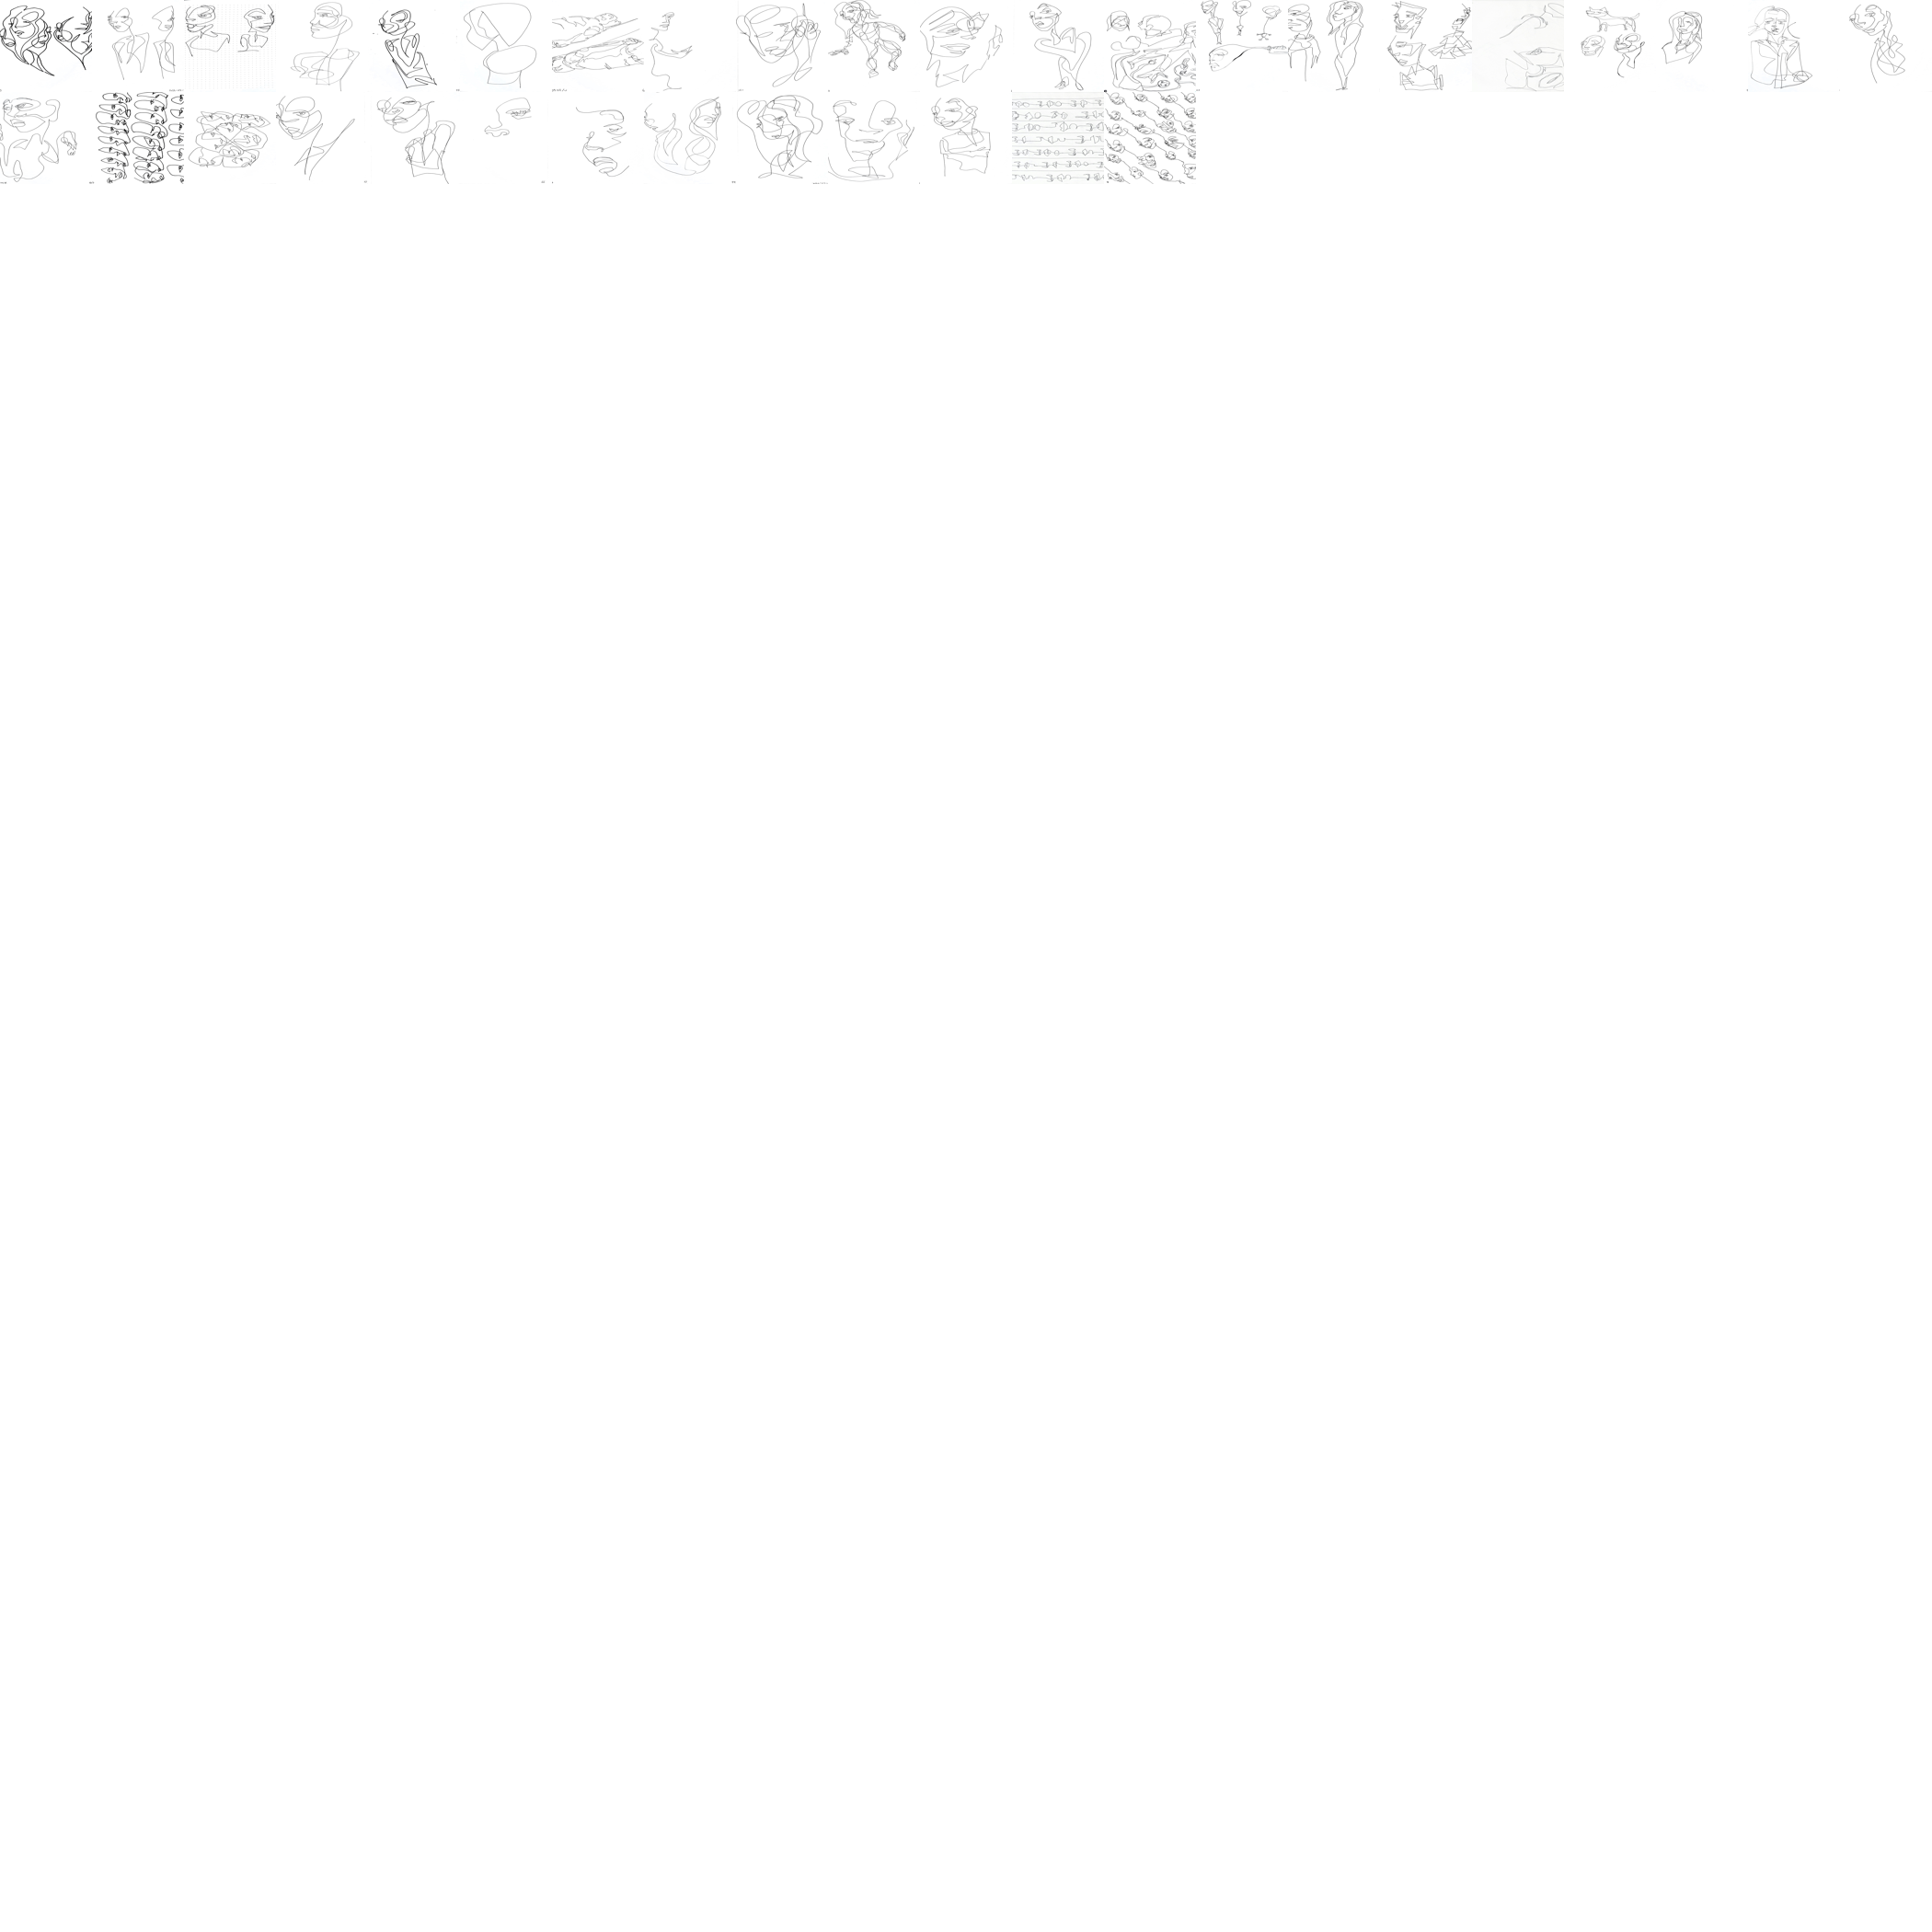

In [ ]:

spriteimage



-0.6198182	-0.5714155	-0.6871516	-0.6553513	-0.6254566	-0.65341413	-0.7267234	-0.4896673	-0.7537334	-0.42715576	1.4904574	-0.72562873	-0.662768	-0.6266761	0.6913696	0.054546177	-0.5467274	-0.6520286	0.117179275	0.94330966	0.5815062	-0.55193967	-0.5446661	-0.6779002	-0.57759243	-0.4584825	-0.3818994	-0.5750927	-0.73986673	-0.45211998	-0.6141643	-0.67007643	-0.52171326	-0.4592305	1.4788612	-0.6186755	0.799198	-0.57338566	-0.17778617	0.10336053	0.093812525	0.17924881	-0.6189488	-0.6682474	2.1040225	-0.59257406	1.6553459	-0.6001429	0.5109105	0.19352531	-0.2517513	-0.66552746	-0.6482407	-0.4732165	-0.7311095	-0.6058329	-0.41851217	-0.6646769	0.19708657	-0.6859715	0.547243	-0.47478092	-0.8143768	0.6043384	-0.45561737	-0.5205148	-0.19637269	-0.67944384	-0.5505594	-0.7467994	-0.64460987	-0.46079588	-0.69849855	-0.41446227	-0.6081119	-0.6608871	0.23214674	1.7035191	-0.47101474	-0.5426106	-0.5526179	1.4402422	0.37750077	-0.4790987	0.46338224	-0.03557557	-0.577085	-0.6104121	0.31350982	0.63637584

In [ ]:
tf_embeddings

'/Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/04_SUBCLUSTERS/tflogs/embeddings/'

```         
<tf.Variable 'Variable:0' shape=(1923, 512) dtype=float32, numpy=
array([[-0.6198182 , -0.5714155 , -0.6871516 , ...,  0.09847462,
        -0.49206764, -0.39251342],
       [ 1.1073987 ,  0.3512016 , -0.73929733, ..., -0.65107447,
        -0.49206764,  0.32716987],
       [ 1.3776337 , -0.5714155 , -0.2587232 , ..., -0.65107447,
        -0.4748875 ,  0.19909522],
       ...,
       [ 1.637738  , -0.5714155 , -0.73929733, ..., -0.65107447,
        -0.13707963,  0.20361403],
       [ 4.6632442 ,  0.29762375, -0.73929733, ...,  0.01897907,
        -0.49206764, -0.39251342],
       [ 0.71924925,  0.20198071,  1.2284024 , ..., -0.22790754,
         0.7221783 , -0.08996937]], dtype=float32)>
```

In [ ]:
weights

# weights = tf.Variable(model.layers[0].get_weights()[0][1:])

<tf.Variable 'Variable:0' shape=(1923, 512) dtype=float32, numpy=
array([[-0.6198182 , -0.5714155 , -0.6871516 , ...,  0.09847462,
        -0.49206764, -0.39251342],
       [ 1.1073987 ,  0.3512016 , -0.73929733, ..., -0.65107447,
        -0.49206764,  0.32716987],
       [ 1.3776337 , -0.5714155 , -0.2587232 , ..., -0.65107447,
        -0.4748875 ,  0.19909522],
       ...,
       [ 1.637738  , -0.5714155 , -0.73929733, ..., -0.65107447,
        -0.13707963,  0.20361403],
       [ 4.6632442 ,  0.29762375, -0.73929733, ...,  0.01897907,
        -0.49206764, -0.39251342],
       [ 0.71924925,  0.20198071,  1.2284024 , ..., -0.22790754,
         0.7221783 , -0.08996937]], dtype=float32)>

In [ ]:

# Create a checkpoint from embedding, the filename and key are the
# name of the tensor.
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(tf_embeddings, "embedding.ckpt"))

checkpoint.save(os.path.join(tf_logs, "embedding.ckpt"))

'/Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/04_SUBCLUSTERS/tflogs/embedding.ckpt-2'

In [ ]:
# Set up config.
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`.
embedding.tensor_name = "embedding/Variable:0"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(tf_embeddings, config)

In [ ]:

%tensorboard --logdir /Users/al/Dropbox/2-Areas/2-Sketchbooks/singleline_data/raster/epoch-20231214/04_SUBCLUSTERS/tflogs


Launching TensorBoard...

In [ ]:
#| hide
import nbdev

nbdev.nbdev_export()